In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model

/home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
temelModel = VGG16(weights='imagenet',include_top = False,  input_shape=(224,224,3))

temelModel.summary()
for layer in temelModel.layers:
    layer.trainable = False

x = Flatten()(temelModel.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs = temelModel.input, outputs = x)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=keras.losses.binary_crossentropy, optimizer=opt,metrics=['accuracy'])

In [5]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
     "../DataSet/covid_and_normal_xray_v1/train_data",
     target_size = (224,224),
     batch_size =32,
     class_mode ='categorical')

Found 2033 images belonging to 2 classes.


In [7]:
validation_generator = test_dataset.flow_from_directory(
    '../DataSet/covid_and_normal_xray_v1/test_data',
    target_size = (224,224),
    batch_size = 32,
    class_mode ='categorical')


Found 508 images belonging to 2 classes.


In [8]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
)

Epoch 1/10
64/64 [==============================] - 286s 4s/step - loss: 0.3444 - accuracy: 0.8371 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 2/10
64/64 [==============================] - 316s 5s/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0116 - val_accuracy: 0.9961
Epoch 3/10
64/64 [==============================] - 303s 5s/step - loss: 0.0424 - accuracy: 0.9855 - val_loss: 0.0304 - val_accuracy: 0.9803
Epoch 4/10
64/64 [==============================] - 348s 5s/step - loss: 0.0230 - accuracy: 0.9910 - val_loss: 0.0111 - val_accuracy: 0.9961
Epoch 5/10
64/64 [==============================] - 327s 5s/step - loss: 0.0210 - accuracy: 0.9912 - val_loss: 0.0162 - val_accuracy: 0.9941
Epoch 6/10
64/64 [==============================] - 322s 5s/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0350 - val_accuracy: 0.9823
Epoch 7/10
64/64 [==============================] - 353s 6s/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0156 - val_accuracy: 0.9941
Epoch 8/10
64

In [9]:
import matplotlib.pyplot as plt
def plot_acc_loss(hist, epochs):
    acc = hist.history['accuracy']
    loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
print(hist)

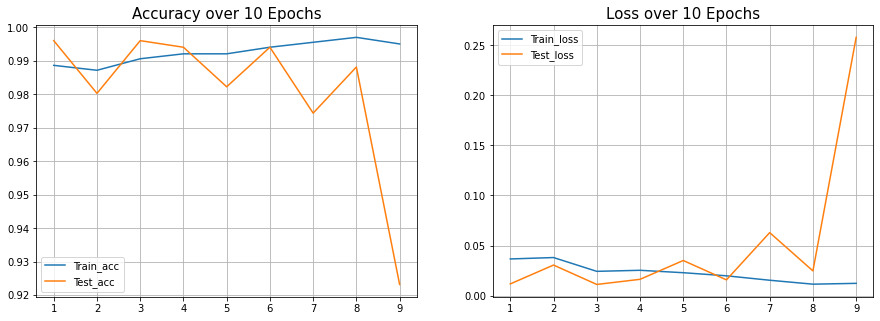

In [11]:
plot_acc_loss(hist,10)

In [12]:
model.save("VGG16.h5")

In [13]:
#Load model
from tensorflow import keras
model = keras.models.load_model('../DataSet/covid_and_normal_xray_v1/model_13_03.h5')

Populating the interactive namespace from numpy and matplotlib


/home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['multiply', 'add', 'subtract', 'minimum', 'average', 'concatenate', 'hist', 'maximum', 'dot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


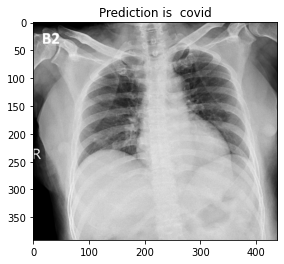

In [14]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('../DataSet/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/train/1-s2.0-S1684118220300682-main.pdf-003-b2.png')
imgplot = plt.imshow(img)

test_image = image.load_img('../DataSet/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/train/1-s2.0-S1684118220300682-main.pdf-003-b2.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

In [15]:
#Prepare validation dataset
test_dataset = image.ImageDataGenerator(rescale = 1./255)

valid_generator = test_dataset.flow_from_directory(
    '../DataSet/chest-xray-for-covid19-detection/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode ='categorical',
    shuffle = False
)

Found 288 images belonging to 2 classes.


In [16]:
#See the score
score = model.evaluate(valid_generator)
print("Loss is:", score[0], "accuracy is:", score[1])

9/9 [==============================] - 36s 4s/step - loss: 3.7601 - accuracy: 0.5000
Loss is: 3.760145425796509 accuracy is: 0.5


AttributeError: 'Text' object has no attribute 'tight_layout'

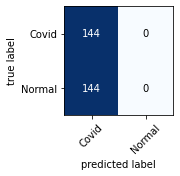

In [17]:
import itertools 
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
%matplotlib inline

#Let's build confusion matrix
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(valid_generator.classes, y_pred)

class_names = ['Covid','Normal']
fig,ax = plot_confusion_matrix(conf_mat= cm, figsize=(2,2),
                              class_names = class_names,
                              show_normed = False)
plt.tight_layout()

In [18]:
print(Y_pred)

[[4.28938029e-06]
 [1.00266933e-03]
 [3.08585167e-03]
 [3.00019979e-04]
 [5.87612391e-04]
 [8.79272819e-03]
 [2.74834037e-03]
 [1.07583404e-03]
 [1.87933445e-04]
 [4.40446734e-02]
 [5.75939417e-02]
 [5.19272089e-02]
 [4.22132015e-03]
 [8.94585252e-03]
 [3.64130735e-03]
 [2.32598186e-03]
 [2.74509192e-04]
 [1.78815899e-05]
 [3.14801931e-04]
 [2.18987465e-04]
 [4.31035733e-05]
 [2.00749934e-02]
 [1.70511007e-03]
 [6.13093376e-04]
 [2.27701664e-03]
 [9.07367939e-05]
 [1.43378973e-04]
 [2.55376101e-04]
 [3.11017036e-04]
 [1.67280287e-01]
 [1.55464411e-02]
 [7.90804625e-04]
 [1.54882669e-04]
 [9.08574462e-03]
 [2.45964527e-03]
 [1.66130066e-03]
 [1.00624561e-03]
 [1.71005726e-04]
 [1.93268061e-03]
 [6.48549914e-01]
 [4.81963158e-04]
 [4.18156385e-04]
 [3.46422195e-04]
 [1.52885914e-04]
 [2.58921981e-02]
 [1.83594227e-03]
 [1.09101195e-04]
 [9.58459079e-02]
 [8.37446569e-05]
 [3.48692536e-02]
 [3.75045383e-05]
 [3.35544348e-04]
 [6.34927928e-05]
 [1.88204646e-03]
 [6.12854958e-04]
 [4.346668